# Data Exploration & Cleaning
Data was taken from IPUMS CPS. The focus of this exploration lies on ethnicity/race.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

In [3]:
#pd.set_option('display.max_columns', None)

Set paths to all files used

In [4]:
#data_path = r'../../data/cps_ethnicity_asec.csv'
#data_path = r'../../data/cps_00003_income.csv'
#data_path = r'../../data/cps_00004.csv'
data_path = r'../../data/cps_00005.csv'


occ_92_02_path = r'../../data/occ_92_02.csv'
occ_03_10_path = r'../../data/occ_03_10.csv'
occ_11_19_path =r'../../data/occ_11_19.csv'
occ_20_path =r'../../data/occ_20.csv'

occ2010_data_path = r'../../data/occ2010_codes.txt'
occ1950_data_path = r'../../data/occ1950_codes.txt'
race_occ_path = r'../../data/race_codes.txt'

Load the main data as a dataframe

In [5]:
data_df = pd.read_csv(data_path)
data_df.head()

,YEAR,SERIAL,CPSID,ASECFLAG,HFLAG,PERNUM,ASECWT,ASECWTCVD,AGE,SEX,...,OCCLY,OCC90LY,OCC10LY,QOCCLY,INCWAGE,MIGSTA1,WHYMOVE,MIGRATE1,UH_SUPREC_A1,UH_SUPREC_A2
0,1962,1,NaN,NaN,NaN,1,1494.99,NaN,18,2,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1962,2,NaN,NaN,NaN,1,1568.53,NaN,14,1,...,NaN,NaN,NaN,NaN,99999999,NaN,NaN,NaN,NaN,NaN
2,1962,3,NaN,NaN,NaN,1,6443.03,NaN,72,1,...,NaN,NaN,NaN,NaN,99999999,NaN,NaN,NaN,NaN,NaN
3,1962,4,NaN,NaN,NaN,1,1473.97,NaN,29,1,...,NaN,NaN,NaN,NaN,1692,NaN,NaN,NaN,NaN,NaN
4,1962,5,NaN,NaN,NaN,1,1538.21,NaN,21,1,...,NaN,NaN,NaN,NaN,1522,NaN,NaN,NaN,NaN,NaN


In [6]:
data_df.drop(['HFLAG', 'ASECOVERP', 'UH_SUPREC_A1', 'UH_SUPREC_A2'],
             axis=1, inplace=True)

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9843814 entries, 0 to 9843813
Data columns (total 33 columns):
 #   Column     Dtype  
---  ------     -----  
 0   YEAR       int64  
 1   SERIAL     int64  
 2   CPSID      float64
 3   ASECFLAG   float64
 4   PERNUM     int64  
 5   ASECWT     float64
 6   ASECWTCVD  float64
 7   AGE        int64  
 8   SEX        int64  
 9   RACE       int64  
 10  ASIAN      float64
 11  SPLOC      int64  
 12  SPRULE     int64  
 13  BPL        float64
 14  YRIMMIG    float64
 15  CITIZEN    float64
 16  MBPL       float64
 17  FBPL       float64
 18  NATIVITY   float64
 19  HISPAN     float64
 20  EMPSTAT    int64  
 21  OCC        int64  
 22  OCC2010    float64
 23  OCC1950    float64
 24  QOCC       float64
 25  OCCLY      float64
 26  OCC90LY    float64
 27  OCC10LY    float64
 28  QOCCLY     float64
 29  INCWAGE    int64  
 30  MIGSTA1    float64
 31  WHYMOVE    float64
 32  MIGRATE1   float64
dtypes: float64(22), int64(11)
memory usage: 2.

----
### Check for NaN values. <br>
The data goes back until 1962. Some variables changed or were added over time, which explains the huge amount of null values for some variables.
Columns that might become important which contain NaN's are ASECFLAG, ASIAN, BPL, YRIMMIG, CITIZEN, MBPL, FBPL, NATIVITY, HISPAN, OCC2010, OCC1950, QOCC, OCCLY, OCC90LY, OCC10LY, QOCCLY, WHYMOVE, MIGRATE1

In [8]:
data_df.isna().sum()

YEAR               0
SERIAL             0
CPSID        1710863
ASECFLAG     1550064
PERNUM             0
ASECWT             0
ASECWTCVD    9342211
AGE                0
SEX                0
RACE               0
ASIAN        7890647
SPLOC              0
SPRULE             0
BPL          4408571
YRIMMIG      4408571
CITIZEN      4408571
MBPL         4408571
FBPL         4408571
NATIVITY     4408571
HISPAN        863183
EMPSTAT            0
OCC                0
OCC2010       415399
OCC1950       415399
QOCC         1550064
OCCLY          71741
OCC90LY       415399
OCC10LY       415399
QOCCLY       3480355
INCWAGE            0
MIGSTA1      2680721
WHYMOVE      5103103
MIGRATE1     1425748
dtype: int64

The following shows that most variables truly only contain null values until some year (the year they started to collect this information). The most important variables (Race, Occ, Year) don't contain nans anyways. However, OCC2010 is preferably used to properly compare information over time since it maps occupations to one overall scheme. Other variables which are interesting for a deeper analysis, Hispanic, Asian, Bpl, Yrimmig don't go back very far. Hence, analysis regarding these topics will focus on a more recent timeframe only.

In [9]:
def check_null_values(variable: str, from_year: int, to_year: int):
    condition = data_df['YEAR'].between(from_year, to_year)
    nans_in_years = data_df[condition][variable].isna().sum()
    other_nans = data_df[~condition][variable].isna().sum()

    print(f'{variable} contains\n {nans_in_years} Nans between {from_year}-{to_year}\n {other_nans} Nans afterwards')

In [10]:
check_null_values('ASECFLAG', 1962, 1975)

ASECFLAG contains
 1550064 Nans between 1962-1975
 0 Nans afterwards


In [11]:
check_null_values('OCC2010', 1962, 1967)

OCC2010 contains
 415399 Nans between 1962-1967
 0 Nans afterwards


In [12]:
check_null_values('OCC10LY', 1962, 1967)

OCC10LY contains
 415399 Nans between 1962-1967
 0 Nans afterwards


In [13]:
check_null_values('HISPAN', 1962, 1970)

HISPAN contains
 863183 Nans between 1962-1970
 0 Nans afterwards


In [14]:
check_null_values('ASIAN', 1962, 2012)

ASIAN contains
 7890647 Nans between 1962-2012
 0 Nans afterwards


In [15]:
check_null_values('BPL', 1962, 1993)

BPL contains
 4408571 Nans between 1962-1993
 0 Nans afterwards


In [16]:
check_null_values('YRIMMIG', 1962, 1993)

YRIMMIG contains
 4408571 Nans between 1962-1993
 0 Nans afterwards


----
### What is the difference between OCC, OCC2010, OCC1950?
According to the description:
* OCC1950: Occupation, 1950 basis
* OCC2010: Occupation, 2010 basis
* OCC: different schemes are used over the years. This would need a lot of mapping and it's hard to make proper over the year comparisons

When checking if the occ2010 and occ1950 codes are consistent we observe this is true for all but 1 case. e.g. for all entries where OCC = 10 -> OCC2010 = 10 and OCC1950 = 290

OCC2010 will be used, since this simplifies over the year comparisons (and is most up to date).

In [17]:
test_df = data_df[data_df['YEAR'] == 2023]

In [18]:
occ_unique_values = test_df['OCC'].unique()

In [19]:
occ2010_df = pd.read_csv(occ2010_data_path, sep='                ', header=None)
occ2010_df.columns = ['Code', 'occ_title']

occ1950_df = pd.read_csv(occ1950_data_path, sep='                ', header=None)
occ1950_df.columns = ['Code', 'occ_title']

occ_df = pd.read_csv(occ_20_path, sep=';')
occ_df.columns = ['Code', 'occ_title']

C:\Users\jputz\AppData\Local\Temp\ipykernel_1996\4222731128.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  occ2010_df = pd.read_csv(occ2010_data_path, sep='                ', header=None)
C:\Users\jputz\AppData\Local\Temp\ipykernel_1996\4222731128.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  occ1950_df = pd.read_csv(occ1950_data_path, sep='                ', header=None)


Since it is not 100% clear how the mapping works for OCC2010 and OCC1950 works, the titles are compared for the year 2023.

In [20]:
for val in occ_unique_values:
    arr_1950 = test_df[test_df['OCC']==val]['OCC1950'].to_numpy()
    arr_2010 = test_df[test_df['OCC']==val]['OCC2010'].to_numpy()

    print('Occ ', val)
    print('1950: ', (arr_1950[0] == arr_1950).all(), '|', occ1950_df[occ1950_df['Code']==arr_1950[0]]['occ_title'].item())
    print('2010:', (arr_2010[0] == arr_2010).all(), '|', occ2010_df[occ2010_df['Code']==arr_2010[0]]['occ_title'].item())
    print('--------------------------------------')

Occ  0
1950:  True |  NIU
2010: True | NIU
--------------------------------------
Occ  4760
1950:  True |  Salesmen and sales clerks (n.e.c.)
2010: True | Retail Salespersons
--------------------------------------
Occ  4220
1950:  True |  Janitors and sextons
2010: True | Janitors and Building Cleaners
--------------------------------------
Occ  2145
1950:  True |  Clerical and kindred workers (n.e.c.)
2010: True | Paralegals and Legal Assistants
--------------------------------------
Occ  8990
1950:  True |  Operative and kindred workers (n.e.c.)
2010: True | Other production workers including semiconductor processors and cooling and freezing equipment operators
--------------------------------------
Occ  2014
1950:  True |  Social and welfare workers, except group
2010: True | Social Workers
--------------------------------------
Occ  410
1950:  True |  Managers and superintendents, building
2010: True | Property, Real Estate, and Community Association Managers
----------------------

Since it is decided to use OCC2010, all other occupation columns can be removed.

In [21]:
data_df.drop(['OCC', 'OCC1950', 'OCC90LY', 'QOCC', 'QOCCLY'],
             axis=1, inplace=True)

----
### ASECFLAG

This dataframe only contains entries with ASECFLAG = 1 since we only extracted ASEC data. Since the variable was introduced in 1975, some entries are nan <br>
This information was collected started from 1975. It indicates if a participant is part of the ASEC or March Basis.

In [22]:
data_df['ASECFLAG'].unique()

array([nan,  1.])

----
### Year
The entire dataset originally contains entries between the years 1962 and 2023.
As already mentioned, not all variables were reported for this entire timespan. Hence, the analysis will mainly focus on 1967 - 2023 and a smaller timespan for more in depth analysis (depending on the variable used).

In [23]:
data_df['YEAR'].unique()

array([1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

In [24]:
data_df = data_df[data_df['YEAR'].between(1967, 2023)]

----
### Age
Some entries seem to represent kids (age <= 14) which have no occupation. We are only interested in adults (age > 18).

In [25]:
np.sort(data_df['AGE'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int64)

In [26]:
data_df[data_df['AGE']<=14]['OCC2010'].unique()

array([  nan, 9999., 6050., 4600., 4230., 4950., 7630., 4110., 4030.,
       9750., 4250., 4060., 4430., 8965., 4650., 4220., 5860., 5510.,
       9360., 4965., 9130., 4000., 8800., 2310., 5620., 5100., 4720.,
       4620., 5320., 6230., 2750., 2740., 3950.,  205., 7810., 6420.,
       9610., 4510., 2630., 5260., 3650., 8830., 7750., 4530., 5140.,
       4420., 4130., 2340., 9620., 4760., 4350., 2720., 2430., 6100.,
       4920., 4140., 8300., 4740., 5120., 5940., 3600., 5820., 6260.,
       5800., 3640., 4850., 8320., 8250., 6330., 5900., 2010., 2200.,
       4840., 2060., 9720., 2810., 2540., 8740., 5700., 5850., 8500.,
       5400., 6130.,  430., 7220., 7700.,  800., 8460., 2020., 7800.,
       8650., 2760., 6355., 6300., 6600., 6320., 6360., 7150., 5550.,
       8510., 9240., 2320., 1540., 6515., 2700., 3530., 8450., 6240.,
       7200., 4040., 8030., 8350., 2800., 8010., 1550., 8230., 7120.,
       9230., 8730.,  310., 2000., 7100., 5920., 8710., 6040., 8930.,
       8950.,  410.,

In [27]:
data_df = data_df[data_df["AGE"] >=18]

----
### Employed

Filter only employed people. They have employment status:

01  Armed Forces, In Labor Force, Employed<br>
10  At work<br>
12  Has job, not at work last week

In [28]:
employed_codes = [1, 10, 12]
unemployed_occ_codes = [0, 9840]
data_df = data_df[data_df["EMPSTAT"].isin(employed_codes)]
data_df = data_df[~data_df["OCCLY"].isin(unemployed_occ_codes)]

----
### ASECWT
weight is used to properly represent the U.S. population. During Covid a different weight calculation was introduced to "account for nonrandom nonresponse". For the years 2019-2021 instead of ASECWT, ASECWTCVD should be used. Therefore for those years the value in ASECWT will be replaced with values from ASECWTCVD.

In [29]:
data_df['ASECWT'].mask(data_df['YEAR'].between(2019, 2021), data_df['ASECWTCVD'], inplace=True)

In [30]:
data_df.drop('ASECWTCVD', axis=1, inplace=True)

----
### Occupation Categories & Titles
Since there are many different occupations, they are divided into categories. 

First an additional column containing the occupation title is introduced. The codes and their corresponding title differs between years for the original OCC variable, which why OCC2010 is used here.

In order to ensure comparability over time, the variable OCC1950 and OCC2010 are provided. OCC2010 maps all OCC codes into a 2010 census scheme. Hence, this column is used for assigning categories. (https://cps.ipums.org/cps-action/variables/OCC2010#description_section)

Load occupation titles

In [31]:
occ2010_titles = pd.read_csv(occ2010_data_path, sep='                ', header=None)
occ2010_titles.columns = ['OCC2010', 'occ_title']

C:\Users\jputz\AppData\Local\Temp\ipykernel_1996\1343910219.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  occ2010_titles = pd.read_csv(occ2010_data_path, sep='                ', header=None)


Load occupation categories

In [32]:
with open('occ_2010_cat.json', 'r') as file:
    occ_2010_cat = json.load(file)

In [33]:
category_df = pd.DataFrame([(code, category) for category, codes in occ_2010_cat.items() for code in codes],
                           columns=['OCC2010', 'Category'])

Merge OCC2010 categories and titles with main dataframe

In [34]:
data_df = pd.merge(data_df, category_df, on='OCC2010')
data_df = pd.merge(data_df, occ2010_titles, on='OCC2010')

#### Category Distribution

In [35]:
pd.set_option('display.max_rows', None)
category_distribution_df = data_df.groupby('Category')['ASECWT'].sum().reset_index(name='ASECWT_sum')
category_distribution_df['count'] = data_df.groupby('Category')['ASECWT'].size().reset_index(name='count')['count']
category_distribution_df.sort_values(by='ASECWT_sum', ascending=False)

,Category,ASECWT_sum,count
19,OFFICE AND ADMINISTRATIVE SUPPORT,9.229715e+08,565045
17,"MANAGEMENT, BUSINESS, SCIENCE, AND ARTS",7.667148e+08,473128
23,SALES AND RELATED,6.863233e+08,406459
21,PRODUCTION,5.974211e+08,376026
25,TRANSPORTATION AND MATERIAL MOVING,4.474224e+08,269949
7,"EDUCATION, TRAINING, AND LIBRARY",3.808033e+08,234357
6,CONSTRUCTION,3.415216e+08,209610
12,HEALTHCARE PRACTITIONERS AND TECHNICAL,3.158580e+08,188178
11,FOOD PREPARATION AND SERVING,2.941565e+08,180074
14,"INSTALLATION, MAINTENANCE, AND REPAIR",2.494068e+08,153497


The plot visualizes the proportion of each occupation category relative to the total sum of weights. It shows that they are not equally distributed.

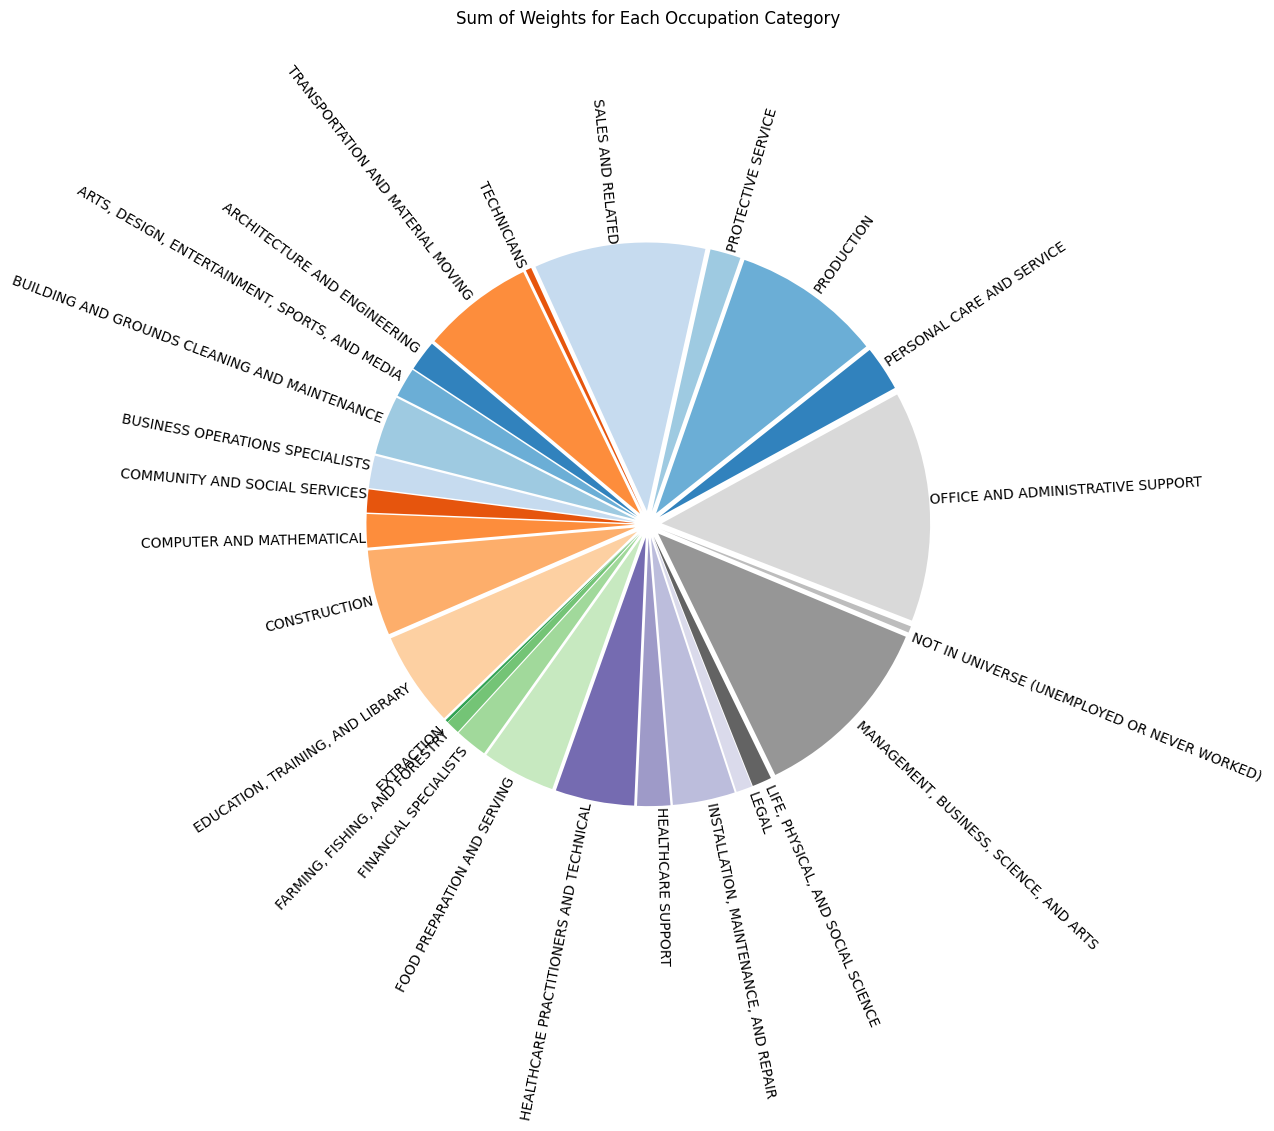

In [36]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(category_distribution_df['ASECWT_sum'], labels=category_distribution_df['Category'],
        rotatelabels=True, labeldistance=1, explode=[0.05] * len(category_distribution_df['Category']),
        startangle=140, colors=plt.cm.tab20c.colors
        )

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax.set_title('Sum of Weights for Each Occupation Category', y = 1.3)
plt.show()

----
### RACE
The number of race categories to choose from varied throughout the years. 
- until 2002, the nr of races ranged between 3 (white, negro, other) to 5 (white, black, American Indian/Eskimo/Aleut, Asian or Pacific Islander, other)
- starting 2003, more than one race could be reported, 21 nr of races
- 2013, 26 different races

Load the race titles corresponding to the race codes

In [37]:
race_codes = pd.read_csv(race_occ_path, sep=';')

In [38]:
race_codes

,RACE,race_title,start,end
0,100,White,1967,2023
1,200,Black,1967,2023
2,300,American Indian/Aleut/Eskimo,1988,2023
3,650,Asian or Pacific Islander,1988,2003
4,651,Asian only,2003,2023
5,652,Hawaiian/Pacific Islander only,2003,2023
6,700,"Other (single) race, n.e.c.",1967,1998
7,800,Two or more races,2003,2023
8,801,White-Black,2003,2023
9,802,White-American Indian,2003,2023


In [38]:
data_df['YEAR'].unique()

array([1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023], dtype=int64)

Until 1987, only White, Black and other was available

In [39]:
np.sort(data_df[data_df['YEAR'].between(1968, 1987)]['RACE'].unique())

array([100, 200, 700], dtype=int64)

Between 1988 and 1997, the races: White, Black, American Indian/Aleut/Eskimo, Asian or Pacific Islander and other were available. Where the two additional ones can also be combined into other to assure comparability prior to 2003.

In [40]:
np.sort(data_df[data_df['YEAR'].between(1988, 1997)]['RACE'].unique())

array([100, 200, 300, 650, 700], dtype=int64)

Other was dropped in 1998 and never used after again

In [41]:
np.sort(data_df[data_df['YEAR'].between(1998, 2002)]['RACE'].unique())

array([100, 200, 300, 650], dtype=int64)

In [42]:
np.sort(data_df[data_df['YEAR'] >= 1998]['RACE'].unique())

array([100, 200, 300, 650, 651, 652, 801, 802, 803, 804, 805, 806, 807,
       808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820,
       830], dtype=int64)

Beginning in 2003, additional to white, black, American Indian/Aleut/Eskimo <br>
Asian or Pacific Islander (650) was split into Asian only (651) and Hawaiian/Pacific Islander (652) <br>
Also more than one race could be reported which lead to additional 14 combinations <br>
plus 'two or three races' and 'four or five races'

In [43]:
np.sort(data_df[data_df['YEAR'].between(2003, 2012)]['RACE'].unique())

array([100, 200, 300, 651, 652, 801, 802, 803, 804, 805, 806, 807, 808,
       809, 810, 811, 812, 813, 814, 820, 830], dtype=int64)

In 2013 all race combinations (until 4 races) were added.

In [44]:
np.sort(data_df[data_df['YEAR'] > 2012]['RACE'].unique())

array([100, 200, 300, 651, 652, 801, 802, 803, 804, 805, 806, 807, 808,
       809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 830],
      dtype=int64)

In [45]:
def race_distribution(df: pd.DataFrame, race_col: str, race_codes: pd.DataFrame) -> pd.DataFrame:
    """ Calculate the total count and the weighted sum
        per race and return results in a dataframe
    """
    counts = df[race_col].value_counts().rename_axis(race_col).reset_index(name='total_counts')
    weights = df.groupby(race_col)['ASECWT'].sum().reset_index(race_col)

    # merge weights and counts per race
    dist = counts.merge(weights, on=race_col)

    # add race titles
    dist = dist.merge(race_codes, on=race_col, how='left')
    dist = dist.reindex(['RACE','race_title','total_counts','ASECWT'], axis=1)  

    return dist

In [46]:
def plot_race_distribution(df: pd.DataFrame, weighed: bool, legend_x: float = 1.15, legend_y: float =.9, title_y: float = 1.4):
    if weighed:
        dist_col = 'ASECWT'
        title = 'Weighed count per race'
    else: 
        dist_col = 'total_counts'
        title = 'Total count per race'

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(df[dist_col], #labels=race_counts["race_y"],
            rotatelabels=True, labeldistance=1, explode=[0.01] * len(df['race_title']),
            startangle=140, colors=plt.cm.tab20c.colors
            )

    ax.set_title(title, y = title_y)
    ax.legend(df['race_title'], ncol=2, loc='lower right', bbox_to_anchor=(legend_x, legend_y))
    plt.show()

In [47]:
data_df['RACE'].unique()

array([100, 200, 700, 300, 650, 651, 802, 805, 810, 652, 801, 803, 808,
       809, 820, 830, 813, 804, 811, 806, 807, 817, 815, 814, 812, 819,
       816, 818], dtype=int64)

In [48]:
race_dist = race_distribution(data_df, 'RACE', race_codes)

The table shows, that those race categories, which were offered a longer amount of time, also have higher counts. 

In [49]:
race_dist.sort_values(by='ASECWT', ascending=False)

,RACE,race_title,total_counts,ASECWT
0,100,White,3430818,5.577316e+09
1,200,Black,378930,7.064388e+08
2,651,Asian only,103591,1.748114e+08
3,650,Asian or Pacific Islander,35971,5.982170e+07
4,300,American Indian/Aleut/Eskimo,30776,3.837204e+07
5,700,"Other (single) race, n.e.c.",29196,3.676848e+07
6,802,White-American Indian,13825,1.915754e+07
8,801,White-Black,6196,1.272816e+07
7,652,Hawaiian/Pacific Islander only,8713,1.052438e+07
9,803,White-Asian,5575,8.512465e+06


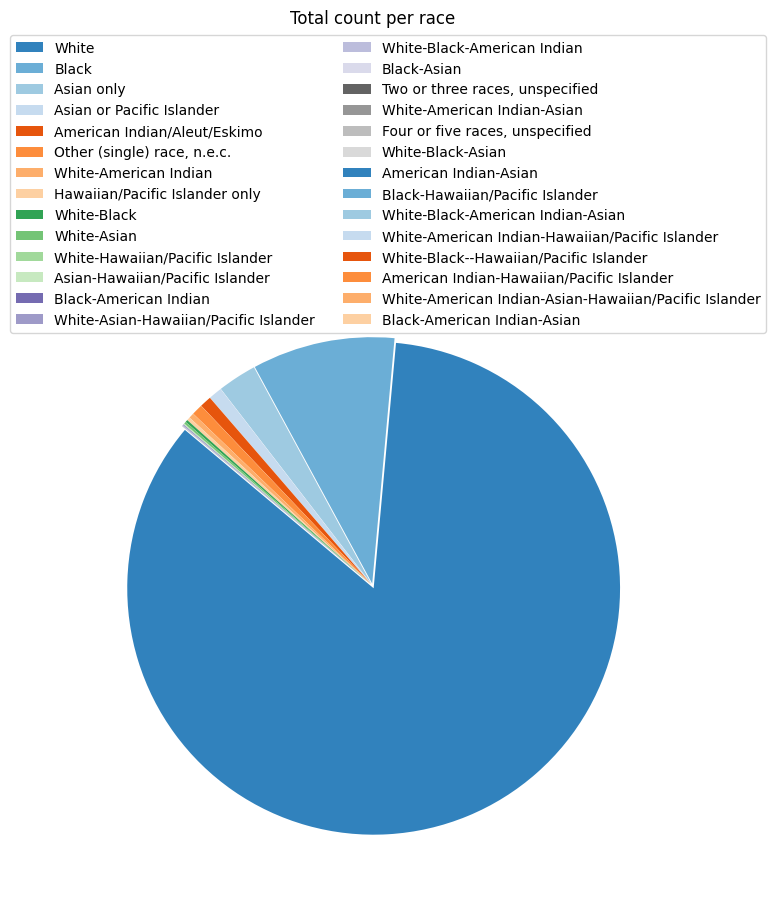

In [50]:
plot_race_distribution(race_dist, weighed=False)

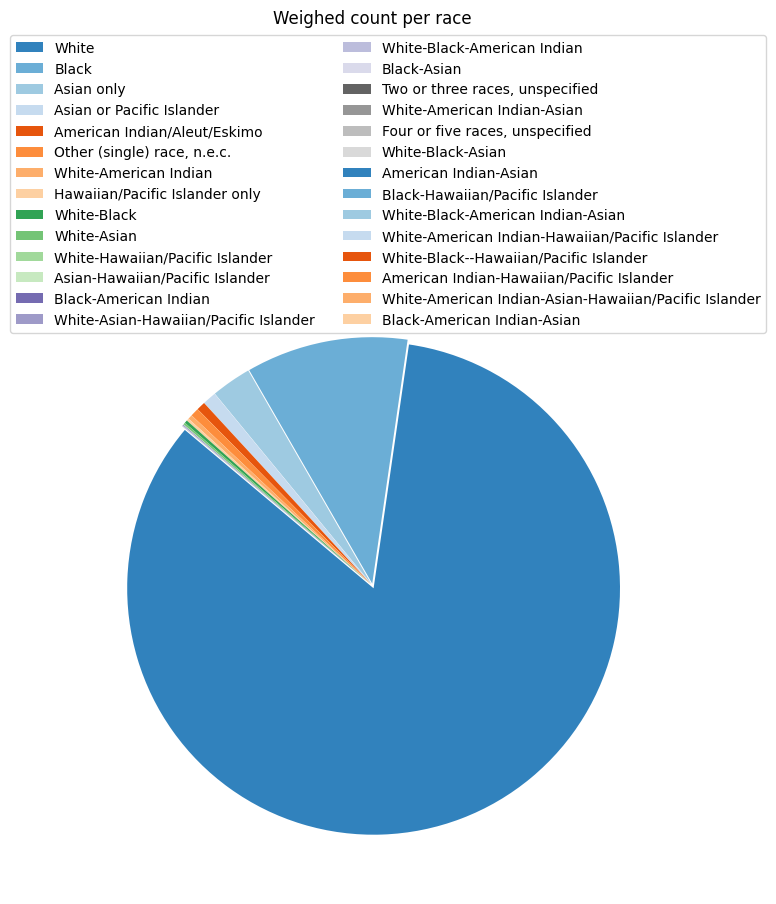

In [51]:
plot_race_distribution(race_dist, weighed=True)

The above plots show that the races are not evenly distributed since they represent the U.S. population. <br>
#### Attempt 1 to restructure races


However, for analytical reasons, some adjustments are made. First, the races 801 - 819 are combined. Up to 2003 or 2013, those could not be chosen seperately anyways.

In [52]:
data_df_restructured = data_df.copy()
data_df_restructured['RACE'] = data_df['RACE'].replace(range(801, 820), 800)

In [53]:
restructured_dist = race_distribution(data_df_restructured, 'RACE', race_codes)

In [54]:
restructured_dist

,RACE,race_title,total_counts,ASECWT
0,100,White,3430818,5.577316e+09
1,200,Black,378930,7.064388e+08
2,651,Asian only,103591,1.748114e+08
3,650,Asian or Pacific Islander,35971,5.982170e+07
4,800,Two or more races,33897,4.983570e+07
5,300,American Indian/Aleut/Eskimo,30776,3.837204e+07
6,700,"Other (single) race, n.e.c.",29196,3.676848e+07
7,652,Hawaiian/Pacific Islander only,8713,1.052438e+07
8,820,"Two or three races, unspecified",210,1.629760e+05
9,830,"Four or five races, unspecified",146,9.962718e+04


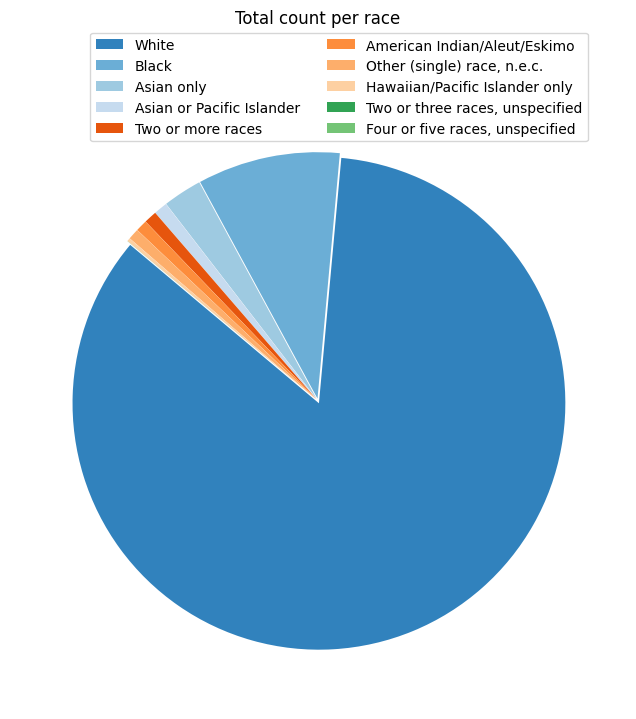

In [55]:
plot_race_distribution(restructured_dist, weighed=False, legend_x=.95, legend_y=.91, title_y = 1.1)

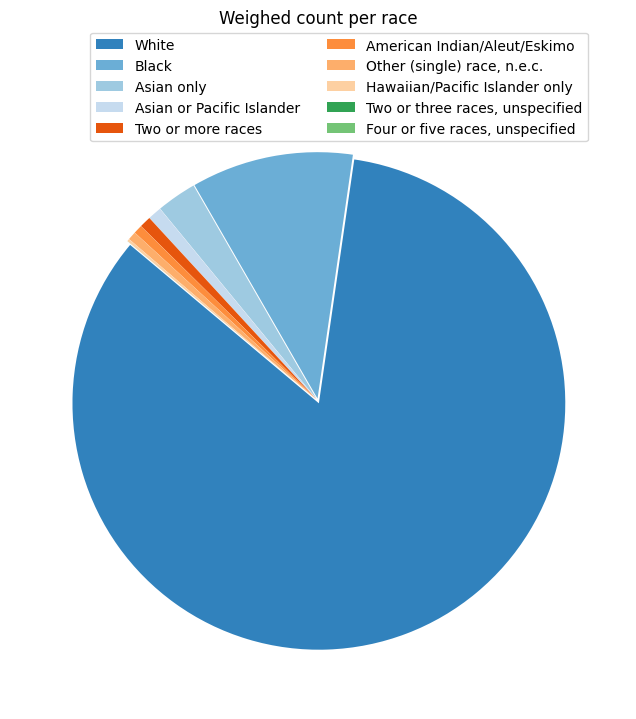

In [56]:
plot_race_distribution(restructured_dist, weighed=True, legend_x=.95, legend_y=.91, title_y = 1.1)

##### Attempt 2 to restructure races
To make comparison over the years possible/easier. According to the documentation, "comparability prior to 2003 can be achieved by combining all codes except 'white' and 'negro/black' into 'other'". To enable comparisons across the entire time-span, an additional race column is introduced, classifying each race that is not white or black as other.

In [57]:
test = data_df.copy()
test['RACE'].mask(~test['RACE'].isin([100, 200]), 700, inplace=True)

In [58]:
data_df['race_comp_all'] =  test['RACE']

Another column to simplify comparisons after 2003 is added. Two or more races will summarize all race groups which combine at least two groups (801-819).

In [59]:
test = data_df.copy()
test['RACE'].mask(test['RACE'].between(800, 819), 800, inplace=True)

In [60]:
#test['RACE'].mask(test['RACE'].isin([651, 652]), 650, inplace=True)

In [61]:
data_df['race_comp_2003'] =  test['RACE']

----
### Asian
This variable was introduced in 2013. <br>
Only people with code 651 (Asian Only) have a ASIAN code assigned, so this is already well labeled/grouped. This is because only respondents which chose Asian only could select a subgroup. Hence, no further adjustments are made.
99 = not in universe.

In [62]:
data_df['ASIAN'].unique()

array([nan, 99., 10., 50., 20., 70., 30., 60., 40.])

In [63]:
for code in data_df['ASIAN'].unique():
    codes = data_df[data_df['ASIAN']==code]['RACE'].unique()
    print(code, ': ', [race_codes[race_codes['RACE'] == r]['RACE'].item() for r in codes])

nan :  []
99.0 :  [100, 300, 200, 803, 802, 801, 652, 810, 804, 809, 817, 830, 815, 806, 805, 813, 814, 811, 820, 807, 812, 808, 819, 816, 818]
10.0 :  [651]
50.0 :  [651]
20.0 :  [651]
70.0 :  [651]
30.0 :  [651]
60.0 :  [651]
40.0 :  [651]


----
### Hispan

This variable also changed throughout the years. Before 2003, five to eight choices (including Hispanic, Negro, Black, German, ...) were available. This variable was introduced in 1976 only details about hispanic responses were preserved (all others labelled not hispanic). After 2003, respondents who answered they are 'Spanish, Hispanic or Latino' were asked more detailed questions.

- 100-109: Mexican
- 200: Puerto Rican
- 300: Cuban
- 400: Dominican
- 500: Salvadoran
- 901, 902: are not relevant (don't know, n/a)

In [64]:
data_df['HISPAN'].unique()

array([ nan,   0., 902., 200., 901., 300., 610., 600., 109., 100., 102.,
       103., 104., 108., 612., 611., 400., 500.])

In [65]:
for code in np.sort(data_df['HISPAN'].unique()):
    codes = data_df[data_df['HISPAN']==code]['RACE'].unique()
    print(code, ': ', [race_codes[race_codes['RACE'] == r]['RACE'].item() for r in codes])

0.0 :  [100, 200, 700, 300, 650, 651, 802, 805, 810, 652, 803, 808, 801, 809, 820, 830, 813, 804, 811, 806, 807, 814, 812, 817, 819, 816, 815, 818]
100.0 :  [100, 700, 802, 300, 200, 803, 652, 651, 801, 810, 804, 811, 814, 813, 805, 806, 809, 812, 808, 820, 819, 807, 817, 830, 815, 816]
102.0 :  [100, 700, 650, 300, 200]
103.0 :  [100, 200, 700]
104.0 :  [100, 650, 700, 300, 200]
108.0 :  [100, 200, 700, 300, 650]
109.0 :  [100, 700, 200]
200.0 :  [100, 700, 200, 650, 300, 801, 651, 802, 817, 652, 803, 809, 810, 804, 805, 830, 813, 820, 808, 806, 814, 812, 807, 815, 811, 816, 818, 819]
300.0 :  [100, 200, 700, 650, 651, 810, 300, 801, 652, 803, 811, 820, 802, 815, 804, 805, 830, 807, 819]
400.0 :  [100, 200, 300, 652, 651, 801, 805, 802, 810, 816, 806, 803]
500.0 :  [100, 801, 200, 810, 651, 300, 802, 803, 652, 805, 812, 804, 814]
600.0 :  [100, 700, 200, 300, 650, 803, 802, 813, 820, 810, 651, 652, 801, 809, 804, 805, 830, 811, 806, 812, 808, 817, 815]
610.0 :  [700, 100, 200, 650, 30

Attempt to restructure the races (not used)

In [66]:
data_df_restructured.loc[data_df_restructured['HISPAN'].isin([100, 102, 103, 104, 108, 109]), 'RACE'] = 910
data_df_restructured.loc[data_df_restructured['HISPAN'].isin([200]), 'RACE'] = 920
data_df_restructured.loc[data_df_restructured['HISPAN'].isin([300]), 'RACE'] = 930
data_df_restructured.loc[data_df_restructured['HISPAN'].isin([400]), 'RACE'] = 940
data_df_restructured.loc[data_df_restructured['HISPAN'].isin([500]), 'RACE'] = 950
data_df_restructured.loc[data_df_restructured['HISPAN'].isin([600, 610, 611, 612]), 'RACE'] = 960

In [67]:
data_df_restructured['RACE'].unique()

array([100, 200, 700, 920, 930, 960, 910, 300, 650, 651, 800, 652, 820,
       830, 940, 950], dtype=int64)

In [68]:
race_codes = pd.read_csv(r'../../data/race_codes_simplified.txt', sep='                 ', header=None)
race_codes.columns = ['RACE', 'race_title']

C:\Users\jputz\AppData\Local\Temp\ipykernel_34504\1885069617.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  race_codes = pd.read_csv(r'../../data/race_codes_simplified.txt', sep='                 ', header=None)


In [69]:
restructured_dist = race_distribution(data_df_restructured, 'RACE', race_codes)

In [70]:
restructured_dist

,RACE,race_title,total_counts,ASECWT
0,100,White,2971148,4.918728e+09
1,200,Black,366271,6.825669e+08
2,910,Mexican,296645,4.412275e+08
3,960,Other Hispanic,117686,1.568064e+08
4,651,Asian only,101389,1.706666e+08
5,920,Puerto Rican,43388,6.083452e+07
6,650,Asian or Pacific Islander,35228,5.889517e+07
7,800,Two or more races,28131,3.920460e+07
8,700,"Other (single) race, n.e.c.",25832,3.339605e+07
9,300,American Indian/Aleut/Eskimo,24784,2.779006e+07


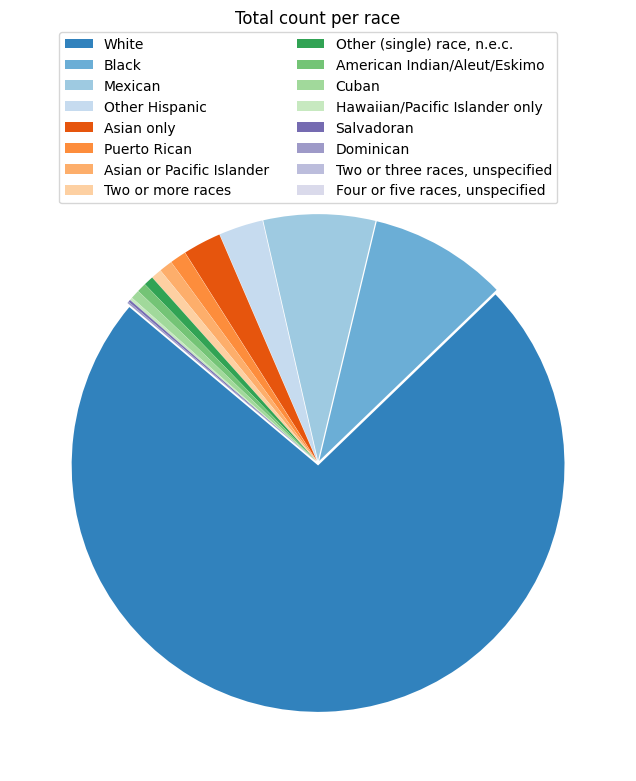

In [71]:
plot_race_distribution(restructured_dist, weighed=False, legend_x=.9, legend_y=.91, title_y=1.2)

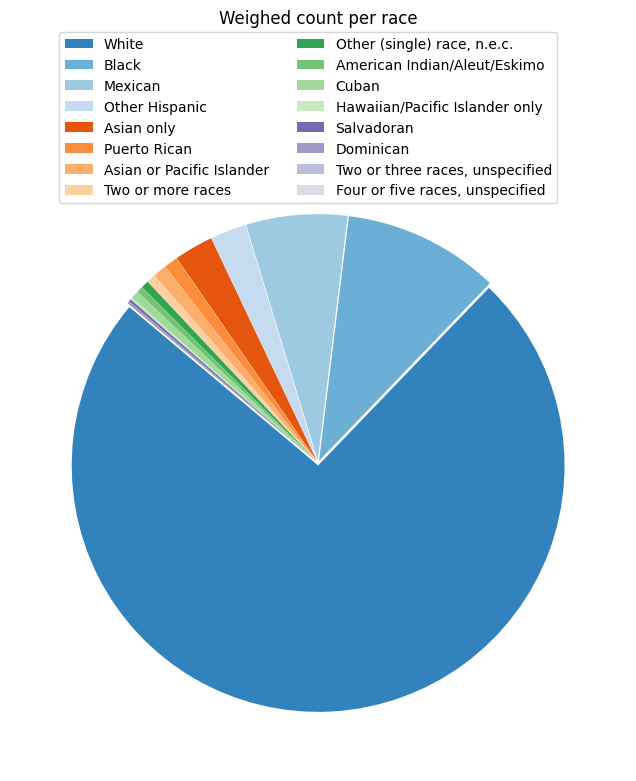

In [72]:
plot_race_distribution(restructured_dist, weighed=True, legend_x=.9, legend_y=.91, title_y=1.2)

## Save dataframe

In [73]:
data_df.to_csv('../../data/cps_clean_original_races.csv', index=False, sep=';')

In [74]:
data_df_restructured.to_csv('../../data/cps_clean_restructured_races.csv', index=False, sep=';')